# Computing a 4 x 4 block of C at a time

We now compute a 4 x 4 block of C at a time in order to use vector instructions and vector registers effectively. 

The idea is as follows: There are special instructions as part of the SSE3 instruction set that allow one to perform two 'multiply accumulate' operations (two multiplies and two adds) per clock cycle for a total of four floating point operations per clock cycle. To use these, one has to place data in 'vector registers'. There are sixteen of these, each of which can hold two double precision numbers. So, we can keep 32 double precision numbers in registers. We will use sixteen of these to hold elements of C, a 4 x 4 block.


* SSE stands for Streaming SIMD Extensions, It is an instruction set extension to x*6 architecture, designed by Intel and introduced in 1999 in their Pentium III. 
* SIMD stands for Single instruction, Multiple data (SIMD). SIMD instructions can greatly increase performance when exactly the same operations are to be performed on multiple data objects. Typical applications are digital signal processing and graphics processing.
* SSE was subsequently expanded by Intel to SSE2, SSE3, SSSE3 and SSE4.

## MMult_4x4_3.c

We will setup a function AddDot4x4 to update a 4x4 block of Matrix C. So we will update 16 elements in Matrix C. 
* Remember for each element update, we need to calucate the dot-product of *ith* row of matrix A and *jth* column of matrix B. 
* The dot-product will have k multiplication and updates because matrix A is m x k and matrix B is k x n

AddDot4x4
* Call 16 times function AddDot

```
void AddDot4x4( int k, double *a, int lda,  double *b, int ldb, double *c, int ldc )
{
  /* So, this routine computes a 4x4 block of matrix A

           C( 0, 0 ), C( 0, 1 ), C( 0, 2 ), C( 0, 3 ).  
           C( 1, 0 ), C( 1, 1 ), C( 1, 2 ), C( 1, 3 ).  
           C( 2, 0 ), C( 2, 1 ), C( 2, 2 ), C( 2, 3 ).  
           C( 3, 0 ), C( 3, 1 ), C( 3, 2 ), C( 3, 3 ).  

     Notice that this routine is called with c = C( i, j ) in the
     previous routine, so these are actually the elements 

           C( i  , j ), C( i  , j+1 ), C( i  , j+2 ), C( i  , j+3 ) 
           C( i+1, j ), C( i+1, j+1 ), C( i+1, j+2 ), C( i+1, j+3 ) 
           C( i+2, j ), C( i+2, j+1 ), C( i+2, j+2 ), C( i+2, j+3 ) 
           C( i+3, j ), C( i+3, j+1 ), C( i+3, j+2 ), C( i+3, j+3 ) 
	  
     in the original matrix C */ 

  /* First row */
  AddDot( k, &A( 0, 0 ), lda, &B( 0, 0 ), &C( 0, 0 ) );
  AddDot( k, &A( 0, 0 ), lda, &B( 0, 1 ), &C( 0, 1 ) );
  AddDot( k, &A( 0, 0 ), lda, &B( 0, 2 ), &C( 0, 2 ) );
  AddDot( k, &A( 0, 0 ), lda, &B( 0, 3 ), &C( 0, 3 ) );

  /* Second row */
  AddDot( k, &A( 1, 0 ), lda, &B( 0, 0 ), &C( 1, 0 ) );
  AddDot( k, &A( 1, 0 ), lda, &B( 0, 1 ), &C( 1, 1 ) );
  AddDot( k, &A( 1, 0 ), lda, &B( 0, 2 ), &C( 1, 2 ) );
  AddDot( k, &A( 1, 0 ), lda, &B( 0, 3 ), &C( 1, 3 ) );

  /* Third row */
  AddDot( k, &A( 2, 0 ), lda, &B( 0, 0 ), &C( 2, 0 ) );
  AddDot( k, &A( 2, 0 ), lda, &B( 0, 1 ), &C( 2, 1 ) );
  AddDot( k, &A( 2, 0 ), lda, &B( 0, 2 ), &C( 2, 2 ) );
  AddDot( k, &A( 2, 0 ), lda, &B( 0, 3 ), &C( 2, 3 ) );

  /* Four row */
  AddDot( k, &A( 3, 0 ), lda, &B( 0, 0 ), &C( 3, 0 ) );
  AddDot( k, &A( 3, 0 ), lda, &B( 0, 1 ), &C( 3, 1 ) );
  AddDot( k, &A( 3, 0 ), lda, &B( 0, 2 ), &C( 3, 2 ) );
  AddDot( k, &A( 3, 0 ), lda, &B( 0, 3 ), &C( 3, 3 ) );
}
```
AddDot
* Dot product, k times multiplication, addition and assignments

```
/* Create macro to let X( i ) equal the ith element of x */

#define X(i) x[ (i)*incx ]

void AddDot( int k, double *x, int incx,  double *y, double *gamma )
{
  /* compute gamma := x' * y + gamma with vectors x and y of length n.

     Here x starts at location x with increment (stride) incx and y starts at location y and has (implicit) stride of 1.
  */
 
  int p;

  for ( p=0; p<k; p++ ){
    *gamma += X( p ) * y[ p ];     
  }
}
```

In [45]:
# load libs
from load_data import load_data

In [ ]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_3 -DOUT=../data/MMult_4x4_3 && make clean &&  make && make test

<Axes: xlabel='p'>

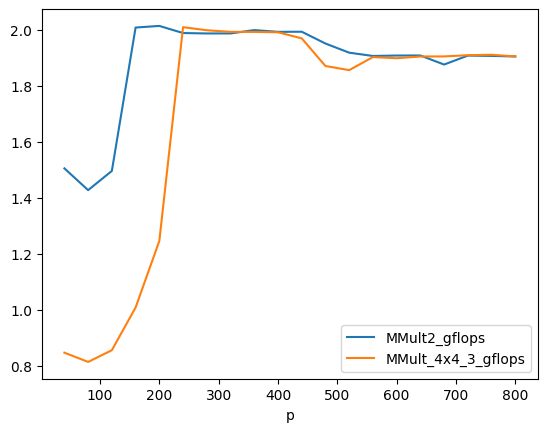

In [12]:
# import result and plot
data = load_data(['../data/MMult2.csv', '../data/MMult_4x4_3.csv'])
data.plot()

### Result

No performance gain at this point

## MMult_4x4_4.c

We just remove the funtion AddDot and "inline" AddDot operation in AddDot4x4. I suppose it will not give performance gain

In [ ]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_4 -DOUT=../data/MMult_4x4_4 && make clean &&  make && make test

<Axes: xlabel='p'>

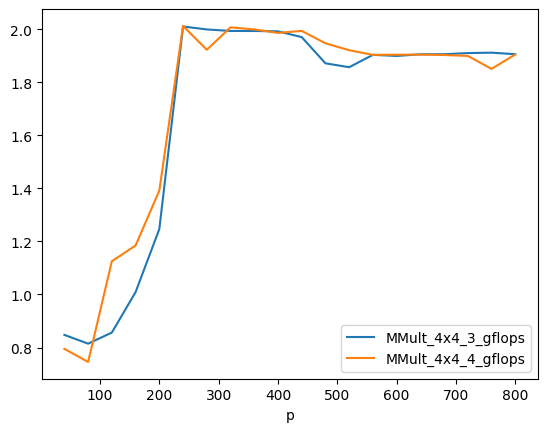

In [17]:
# import result and plot
data = load_data(['../data/MMult_4x4_3.csv', '../data/MMult_4x4_4.csv'])
data.plot()

## MMult_4x4_5.c

In this version, we merge each set of four loops, computing four inner products simultaneously. Note:

* In previous version, we use 16 for-loops to calculate 16 dot-products.
* In this version, only 1 for-loop to calculate 16 dot-products. Then we start to get performance benefit from blocking, i.e. fuse 16 loops into 1 loop

```
    /* First row */
    //  AddDot( k, &A( 0, 0 ), lda, &B( 0, 0 ), &C( 0, 0 ) );
    for ( p=0; p<k; p++ ){
        C( 0, 0 ) += A( 0, p ) * B( p, 0 );  
        C( 0, 1 ) += A( 0, p ) * B( p, 1 );
        C( 0, 2 ) += A( 0, p ) * B( p, 2 ); 
        C( 0, 3 ) += A( 0, p ) * B( p, 3 );  
        
        /* Second row */
        C( 1, 0 ) += A( 1, p ) * B( p, 0 );     
        C( 1, 1 ) += A( 1, p ) * B( p, 1 );     
        C( 1, 2 ) += A( 1, p ) * B( p, 2 );     
        C( 1, 3 ) += A( 1, p ) * B( p, 3 );     

        /* Third row */
        C( 2, 0 ) += A( 2, p ) * B( p, 0 );     
        C( 2, 1 ) += A( 2, p ) * B( p, 1 );     
        C( 2, 2 ) += A( 2, p ) * B( p, 2 );     
        C( 2, 3 ) += A( 2, p ) * B( p, 3 );     

        /* Fourth row */
        C( 3, 0 ) += A( 3, p ) * B( p, 0 );     
        C( 3, 1 ) += A( 3, p ) * B( p, 1 );     
        C( 3, 2 ) += A( 3, p ) * B( p, 2 );     
        C( 3, 3 ) += A( 3, p ) * B( p, 3 );   
    }
```

In [29]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_5 -DOUT=../data/MMult_4x4_5 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

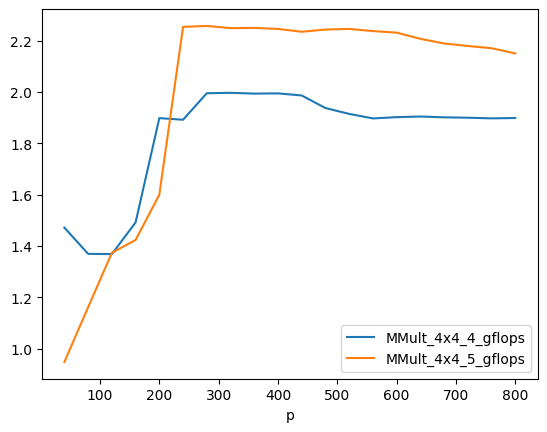

In [30]:
# import result and plot
data = load_data(['../data/MMult_4x4_4.csv', '../data/MMult_4x4_5.csv'])
data.plot()

### Result

We get performance gain from blocking

## MMult_4x4_6.c

In this version, We accumulate the elements of C in registers and use a register for elements of A. i.e.
* use register to gain performance
* use 4x4 block to gain performance by fusing 16 loops into 1 loop

```
void AddDot4x4( int k, double *a, int lda,  double *b, int ldb, double *c, int ldc )
{
  /* So, this routine computes a 4x4 block of matrix A

           C( 0, 0 ), C( 0, 1 ), C( 0, 2 ), C( 0, 3 ).  
           C( 1, 0 ), C( 1, 1 ), C( 1, 2 ), C( 1, 3 ).  
           C( 2, 0 ), C( 2, 1 ), C( 2, 2 ), C( 2, 3 ).  
           C( 3, 0 ), C( 3, 1 ), C( 3, 2 ), C( 3, 3 ).  

     Notice that this routine is called with c = C( i, j ) in the
     previous routine, so these are actually the elements 

           C( i  , j ), C( i  , j+1 ), C( i  , j+2 ), C( i  , j+3 ) 
           C( i+1, j ), C( i+1, j+1 ), C( i+1, j+2 ), C( i+1, j+3 ) 
           C( i+2, j ), C( i+2, j+1 ), C( i+2, j+2 ), C( i+2, j+3 ) 
           C( i+3, j ), C( i+3, j+1 ), C( i+3, j+2 ), C( i+3, j+3 ) 
	  
     in the original matrix C 
     
     in this version, we merge each set of four loops, computing four
     inner products simultaneously. 
     
     in this version, we accumulate in registers and put A( 0, p ) in a register 
     */ 

    int p;
    
    register double 
    /* hold contributions to
       C( 0, 0 ), C( 0, 1 ), C( 0, 2 ), C( 0, 3 ) 
       C( 1, 0 ), C( 1, 1 ), C( 1, 2 ), C( 1, 3 ) 
       C( 2, 0 ), C( 2, 1 ), C( 2, 2 ), C( 2, 3 ) 
       C( 3, 0 ), C( 3, 1 ), C( 3, 2 ), C( 3, 3 )   */
    c_00_reg,   c_01_reg,   c_02_reg,   c_03_reg,  
    c_10_reg,   c_11_reg,   c_12_reg,   c_13_reg,  
    c_20_reg,   c_21_reg,   c_22_reg,   c_23_reg,  
    c_30_reg,   c_31_reg,   c_32_reg,   c_33_reg,
    /* hold 
       A( 0, p ) 
       A( 1, p ) 
       A( 2, p ) 
       A( 3, p ) */
    a_0p_reg,
    a_1p_reg,
    a_2p_reg,
    a_3p_reg;

    c_00_reg = 0.0;   c_01_reg = 0.0;   c_02_reg = 0.0;   c_03_reg = 0.0;
    c_10_reg = 0.0;   c_11_reg = 0.0;   c_12_reg = 0.0;   c_13_reg = 0.0;
    c_20_reg = 0.0;   c_21_reg = 0.0;   c_22_reg = 0.0;   c_23_reg = 0.0;
    c_30_reg = 0.0;   c_31_reg = 0.0;   c_32_reg = 0.0;   c_33_reg = 0.0;
    
    //  AddDot( k, &A( 0, 0 ), lda, &B( 0, 0 ), &C( 0, 0 ) );
    for ( p=0; p<k; p++ ){
        a_0p_reg = A( 0, p );
        a_1p_reg = A( 1, p );
        a_2p_reg = A( 2, p );
        a_3p_reg = A( 3, p );
        
        /* First row */    
        c_00_reg += a_0p_reg * B( p, 0 );  
        c_01_reg += a_0p_reg * B( p, 1 );
        c_02_reg += a_0p_reg * B( p, 2 ); 
        c_03_reg += a_0p_reg * B( p, 3 );  
        
        /* Second row */
        c_10_reg += a_1p_reg * B( p, 0 );     
        c_11_reg += a_1p_reg * B( p, 1 );     
        c_12_reg += a_1p_reg * B( p, 2 );     
        c_13_reg += a_1p_reg * B( p, 3 );     

        /* Third row */
        c_20_reg += a_2p_reg * B( p, 0 );     
        c_21_reg += a_2p_reg * B( p, 1 );     
        c_22_reg += a_2p_reg * B( p, 2 );     
        c_23_reg += a_2p_reg * B( p, 3 );     

        /* Four row */
        c_30_reg += a_3p_reg * B( p, 0 );     
        c_31_reg += a_3p_reg * B( p, 1 );     
        c_32_reg += a_3p_reg * B( p, 2 );     
        c_33_reg += a_3p_reg * B( p, 3 );     
    }
    
    // update C(i,j) with value in register
    C( 0, 0 ) += c_00_reg;   C( 0, 1 ) += c_01_reg;   C( 0, 2 ) += c_02_reg;   C( 0, 3 ) += c_03_reg;
    C( 1, 0 ) += c_10_reg;   C( 1, 1 ) += c_11_reg;   C( 1, 2 ) += c_12_reg;   C( 1, 3 ) += c_13_reg;
    C( 2, 0 ) += c_20_reg;   C( 2, 1 ) += c_21_reg;   C( 2, 2 ) += c_22_reg;   C( 2, 3 ) += c_23_reg;
    C( 3, 0 ) += c_30_reg;   C( 3, 1 ) += c_31_reg;   C( 3, 2 ) += c_32_reg;   C( 3, 3 ) += c_33_reg;
}
```

In [ ]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_6 -DOUT=../data/MMult_4x4_6 && make clean &&  make && make test

<Axes: xlabel='p'>

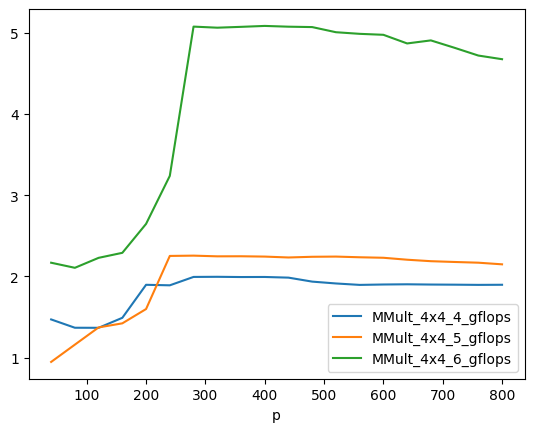

In [31]:
# import result and plot
data = load_data(['../data/MMult_4x4_4.csv', '../data/MMult_4x4_5.csv','../data/MMult_4x4_6.csv' ])
data.plot()

### Result

We gain performance from both using register and blocking.
* using register will improve performance for both small and big matrix
* blocking mostly improve performance for big size matrix

## MMult_4x4_7.c

We use pointers to address elements in B

```
void AddDot4x4( int k, double *a, int lda,  double *b, int ldb, double *c, int ldc )
{
  /* So, this routine computes a 4x4 block of matrix A

           C( 0, 0 ), C( 0, 1 ), C( 0, 2 ), C( 0, 3 ).  
           C( 1, 0 ), C( 1, 1 ), C( 1, 2 ), C( 1, 3 ).  
           C( 2, 0 ), C( 2, 1 ), C( 2, 2 ), C( 2, 3 ).  
           C( 3, 0 ), C( 3, 1 ), C( 3, 2 ), C( 3, 3 ).  

     Notice that this routine is called with c = C( i, j ) in the
     previous routine, so these are actually the elements 

           C( i  , j ), C( i  , j+1 ), C( i  , j+2 ), C( i  , j+3 ) 
           C( i+1, j ), C( i+1, j+1 ), C( i+1, j+2 ), C( i+1, j+3 ) 
           C( i+2, j ), C( i+2, j+1 ), C( i+2, j+2 ), C( i+2, j+3 ) 
           C( i+3, j ), C( i+3, j+1 ), C( i+3, j+2 ), C( i+3, j+3 ) 
	  
     in the original matrix C 
     
     in this version, we merge each set of four loops, computing four
     inner products simultaneously. 
     
     in this version, we accumulate in registers and put A( 0, p ) in a register 
     */ 

    int p;
    
    register double 
    /* hold contributions to
       C( 0, 0 ), C( 0, 1 ), C( 0, 2 ), C( 0, 3 ) 
       C( 1, 0 ), C( 1, 1 ), C( 1, 2 ), C( 1, 3 ) 
       C( 2, 0 ), C( 2, 1 ), C( 2, 2 ), C( 2, 3 ) 
       C( 3, 0 ), C( 3, 1 ), C( 3, 2 ), C( 3, 3 )   */
    c_00_reg,   c_01_reg,   c_02_reg,   c_03_reg,  
    c_10_reg,   c_11_reg,   c_12_reg,   c_13_reg,  
    c_20_reg,   c_21_reg,   c_22_reg,   c_23_reg,  
    c_30_reg,   c_31_reg,   c_32_reg,   c_33_reg,
    /* hold 
       A( 0, p ) 
       A( 1, p ) 
       A( 2, p ) 
       A( 3, p ) */
    a_0p_reg,
    a_1p_reg,
    a_2p_reg,
    a_3p_reg;

    c_00_reg = 0.0;   c_01_reg = 0.0;   c_02_reg = 0.0;   c_03_reg = 0.0;
    c_10_reg = 0.0;   c_11_reg = 0.0;   c_12_reg = 0.0;   c_13_reg = 0.0;
    c_20_reg = 0.0;   c_21_reg = 0.0;   c_22_reg = 0.0;   c_23_reg = 0.0;
    c_30_reg = 0.0;   c_31_reg = 0.0;   c_32_reg = 0.0;   c_33_reg = 0.0;
    
    //  AddDot( k, &A( 0, 0 ), lda, &B( 0, 0 ), &C( 0, 0 ) );
    for ( p=0; p<k; p++ ){
        a_0p_reg = A( 0, p );
        a_1p_reg = A( 1, p );
        a_2p_reg = A( 2, p );
        a_3p_reg = A( 3, p );
        
        /* First row */    
        c_00_reg += a_0p_reg * B( p, 0 );  
        c_01_reg += a_0p_reg * B( p, 1 );
        c_02_reg += a_0p_reg * B( p, 2 ); 
        c_03_reg += a_0p_reg * B( p, 3 );  
        
        /* Second row */
        c_10_reg += a_1p_reg * B( p, 0 );     
        c_11_reg += a_1p_reg * B( p, 1 );     
        c_12_reg += a_1p_reg * B( p, 2 );     
        c_13_reg += a_1p_reg * B( p, 3 );     

        /* Third row */
        c_20_reg += a_2p_reg * B( p, 0 );     
        c_21_reg += a_2p_reg * B( p, 1 );     
        c_22_reg += a_2p_reg * B( p, 2 );     
        c_23_reg += a_2p_reg * B( p, 3 );     

        /* Four row */
        c_30_reg += a_3p_reg * B( p, 0 );     
        c_31_reg += a_3p_reg * B( p, 1 );     
        c_32_reg += a_3p_reg * B( p, 2 );     
        c_33_reg += a_3p_reg * B( p, 3 );     
    }
    
    // update C(i,j) with value in register
    C( 0, 0 ) += c_00_reg;   C( 0, 1 ) += c_01_reg;   C( 0, 2 ) += c_02_reg;   C( 0, 3 ) += c_03_reg;
    C( 1, 0 ) += c_10_reg;   C( 1, 1 ) += c_11_reg;   C( 1, 2 ) += c_12_reg;   C( 1, 3 ) += c_13_reg;
    C( 2, 0 ) += c_20_reg;   C( 2, 1 ) += c_21_reg;   C( 2, 2 ) += c_22_reg;   C( 2, 3 ) += c_23_reg;
    C( 3, 0 ) += c_30_reg;   C( 3, 1 ) += c_31_reg;   C( 3, 2 ) += c_32_reg;   C( 3, 3 ) += c_33_reg;
}
```

In [40]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_7 -DOUT=../data/MMult_4x4_7 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

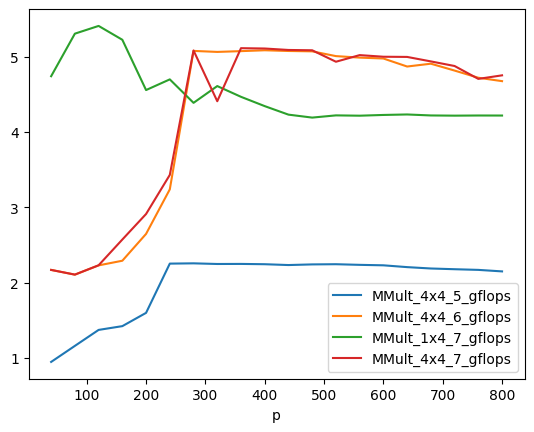

In [41]:
# import result and plot
data = load_data(['../data/MMult_4x4_5.csv', '../data/MMult_4x4_6.csv','../data/MMult_1x4_7.csv', '../data/MMult_4x4_7.csv' ])
data.plot()

### Result

* Compare with optimization 6, it is said that we reduced index overhead. 
* Compare with 1x4 block optimization 7, the performance is not improved. Both 1x4 and 4x4 blocking fusion gain almost same performance

## Optimization 8

We store a row of k x 4 matrix B in registers, i.e. use registers for elements in Matrix B.
Because we unrolled as 4x4 block, so b_p0_reg will be also used 4 times in 1 loop.

Part of code in MMult_4x4_8
```
    ...
    //  AddDot( k, &A( 0, 0 ), lda, &B( 0, 0 ), &C( 0, 0 ) );
    for ( p=0; p<k; p++ ){
        a_0p_reg = A( 0, p );
        a_1p_reg = A( 1, p );
        a_2p_reg = A( 2, p );
        a_3p_reg = A( 3, p );
        
        b_p0_reg = *b_p0_pntr++;
        b_p1_reg = *b_p1_pntr++;
        b_p2_reg = *b_p2_pntr++;
        b_p3_reg = *b_p3_pntr++;
        
        /* First row */    
        c_00_reg += a_0p_reg * b_p0_reg;
        c_01_reg += a_0p_reg * b_p1_reg;
        c_02_reg += a_0p_reg * b_p2_reg; 
        c_03_reg += a_0p_reg * b_p3_reg;
        
        /* Second row */
        c_10_reg += a_1p_reg * b_p0_reg;     
        c_11_reg += a_1p_reg * b_p1_reg;     
        c_12_reg += a_1p_reg * b_p2_reg;     
        c_13_reg += a_1p_reg * b_p3_reg;     

        /* Third row */
        c_20_reg += a_2p_reg * b_p0_reg;     
        c_21_reg += a_2p_reg * b_p1_reg;     
        c_22_reg += a_2p_reg * b_p2_reg;     
        c_23_reg += a_2p_reg * b_p3_reg;     

        /* Four row */
        c_30_reg += a_3p_reg * b_p0_reg; 
        c_31_reg += a_3p_reg * b_p1_reg;     
        c_32_reg += a_3p_reg * b_p2_reg;     
        c_33_reg += a_3p_reg * b_p3_reg;     
    }
    ...
```

In [38]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_8 -DOUT=../data/MMult_4x4_8 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

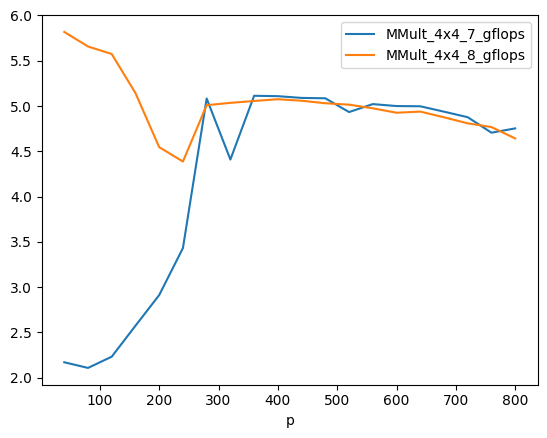

In [42]:
# import result and plot
data = load_data(['../data/MMult_4x4_7.csv', '../data/MMult_4x4_8.csv'])
data.plot()

### Result

We did not gain on performance. We have the same situation for 1x4 block to use register on element in Matrix B.

## Optimization 9

We rearrange the computation so that two rows of 4x4 block of C are computed at a time. Instead of updating the rows of 4x4 block C a row at a time, we compute them two rows at a time.
This sets us up for using vector operations, where we update pairs C( 0,j ) and C( 1,j ) (j =0,...,3) with vector operations.
In brief, we just re-arrange the order of code. This re-arrangement will not give performance benefit

The reason we combine first row and second row (just reorder) is to prepare to use vector operation in next optimization

```
        /* First row and second row*/    
        c_00_reg += a_0p_reg * b_p0_reg;
        c_10_reg += a_1p_reg * b_p0_reg; 
        
        c_01_reg += a_0p_reg * b_p1_reg;
        c_11_reg += a_1p_reg * b_p1_reg;     
        
        c_02_reg += a_0p_reg * b_p2_reg;
        c_12_reg += a_1p_reg * b_p2_reg;     

        c_03_reg += a_0p_reg * b_p3_reg;
        c_13_reg += a_1p_reg * b_p3_reg;     

        /* Third row and fourth row*/
        c_20_reg += a_2p_reg * b_p0_reg;
        c_30_reg += a_3p_reg * b_p0_reg; 
        
        c_21_reg += a_2p_reg * b_p1_reg;     
        c_31_reg += a_3p_reg * b_p1_reg;     
        
        c_22_reg += a_2p_reg * b_p2_reg;     
        c_32_reg += a_3p_reg * b_p2_reg;     
        
        c_23_reg += a_2p_reg * b_p3_reg;     
        c_33_reg += a_3p_reg * b_p3_reg;     

```

In [52]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_9 -DOUT=../data/MMult_4x4_9 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

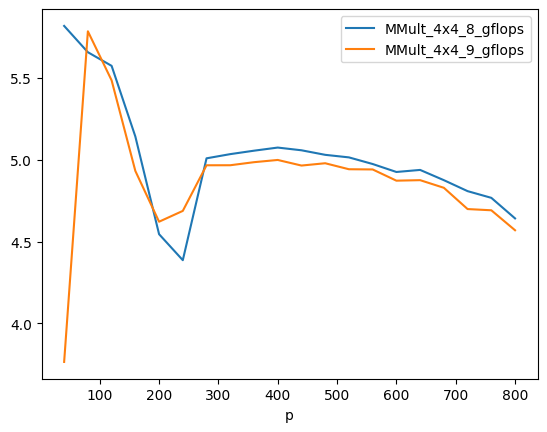

In [51]:
# import result and plot
data = load_data(['../data/MMult_4x4_8.csv', '../data/MMult_4x4_9.csv'])
data.plot()

## Optimization 10

We use vector registers and vector operations. 
* First we need to include some new header files to use SSE, AVX intrinsic function
* We also define a union which can hold the vector v (128 bit, for 2 double variable) or array d (length 2)

```

#include <mmintrin.h>
#include <xmmintrin.h>  // SSE
#include <pmmintrin.h>  // SSE2
#include <emmintrin.h>  // SSE3

typedef union
{
  __m128d v;
  double d[2];
} v2df_t;
```

We combine 2 elements in Matrix C, Matrix B and Matrix A into 1 vector during inner product calculation

```
  v2df_t
    c_00_c_10_vreg,    c_01_c_11_vreg,    c_02_c_12_vreg,    c_03_c_13_vreg,
    c_20_c_30_vreg,    c_21_c_31_vreg,    c_22_c_32_vreg,    c_23_c_33_vreg,
    a_0p_a_1p_vreg,
    a_2p_a_3p_vreg,
    b_p0_vreg, b_p1_vreg, b_p2_vreg, b_p3_vreg; 
```

* We use _mm_setzero_pd() to initialize the vector
* We use _mm_load_pd to read 2 double data into vector for elements in C and A
* For element in B, we use _mm_loaddup_pd to read 1 double data into v[0:63] and also duplicated it into v[64:127]

```
for ( p=0; p<k; p++ ){
    a_0p_a_1p_vreg.v = _mm_load_pd( (double *) &A( 0, p ) );
    a_2p_a_3p_vreg.v = _mm_load_pd( (double *) &A( 2, p ) );

    b_p0_vreg.v = _mm_loaddup_pd( (double *) b_p0_pntr++ );   /* load and duplicate */
    b_p1_vreg.v = _mm_loaddup_pd( (double *) b_p1_pntr++ );   /* load and duplicate */
    b_p2_vreg.v = _mm_loaddup_pd( (double *) b_p2_pntr++ );   /* load and duplicate */
    b_p3_vreg.v = _mm_loaddup_pd( (double *) b_p3_pntr++ );   /* load and duplicate */
    
    ...
}
```

For inner product calculate, we could see 4 statements correspond to 8 statements in optimization 9

In MMult_4x4_9.c
```
        /* First row and second row*/    
        c_00_reg += a_0p_reg * b_p0_reg;
        c_10_reg += a_1p_reg * b_p0_reg; 
        
        c_01_reg += a_0p_reg * b_p1_reg;
        c_11_reg += a_1p_reg * b_p1_reg;     
        
        c_02_reg += a_0p_reg * b_p2_reg;
        c_12_reg += a_1p_reg * b_p2_reg;     

        c_03_reg += a_0p_reg * b_p3_reg;
        c_13_reg += a_1p_reg * b_p3_reg;     

```

In MMult_4x4_10.c
```
        /* First row and second row*/    
        c_00_c_10_vreg.v += a_0p_a_1p_vreg.v * b_p0_vreg.v;
        c_01_c_11_vreg.v += a_0p_a_1p_vreg.v * b_p1_vreg.v;
        c_02_c_12_vreg.v += a_0p_a_1p_vreg.v * b_p2_vreg.v;
        c_03_c_13_vreg.v += a_0p_a_1p_vreg.v * b_p3_vreg.v;
```




In [53]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_10 -DOUT=../data/MMult_4x4_10 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

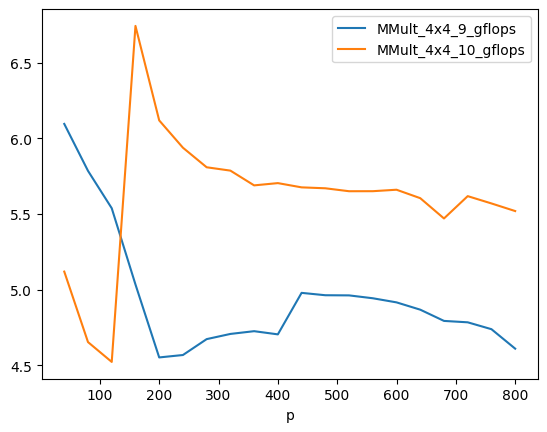

In [54]:
# import result and plot
data = load_data(['../data/MMult_4x4_9.csv', '../data/MMult_4x4_10.csv'])
data.plot()

### Result

We get performance gain in both small and big matrix. We use vector operation to get benefit from SIMD (Single Instruction Multiple Data). In our case, 1 instruction to handle 2 data multiplication

## Optimization 11

In order to maintain the performance attained for smaller problem sizes, we block matrix C (and A and B correspondingly)

```
/* We block the matrix C as mc x n, the matrix A as mc x kc, the matrix B as kc x nc */
void MY_MMult( int m, int n, int k, double *a, int lda, 
                                    double *b, int ldb,
                                    double *c, int ldc )
{
    int i, j, p, pb, ib;
    
    /* This time, we compute a mc x n block of C by a call to the InnerKernel */
    for ( p=0, p<k; p+=kc ) {
        pb = min( k-p, kc ); // if left colums of Matrix B less than kc, then column of blocksize is k-p 
        for ( i=0, i<m; i+=mc) {
            ib = min( m-i, mc ) // if left rows of Matrix A less than kc, then column of blocksize is m-i 
            InnerKernel (ib, n, pb, &A( i,p ), lda, &B(p, 0 ), ldb, &C( i,0 ), ldc );
        }
    }
}

/* This InnerKernel is old MY_MMult to calucate Matrix Multiplication with 4x4 blocking */
void InnerKernel( int m, int n, int k, double *a, int lda, 
                                       double *b, int ldb,
                                       double *c, int ldc )
{
  int i, j;

  for ( j=0; j<n; j+=4 ){        /* Loop over the columns of C, unrolled by 4 */
    for ( i=0; i<m; i+=4 ){        /* Loop over the rows of C */
      /* Update C( i,j ), C( i,j+1 ), C( i,j+2 ), and C( i,j+3 ) in one routine (four inner products) */

      AddDot4x4( k, &A( i,0 ), lda, &B( 0,j ), ldb, &C( i,j ), ldc );
    }
  }
}
```

This will give the performance gain.

In [63]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_11 -DOUT=../data/MMult_4x4_11 && make clean &&  make && make test

-- Configuring done
-- Generating done
-- Build files have been written to: /root/build
make -f CMakeFiles/Makefile2 clean
make[1]: Entering directory '/root/build'
make -f CMakeFiles/test_MMult.x.dir/build.make CMakeFiles/test_MMult.x.dir/clean
make[2]: Entering directory '/root/build'
/usr/bin/cmake -P CMakeFiles/test_MMult.x.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeFiles/utils.dir/clean
make[2]: Entering directory '/root/build'
cd /root/build/utils && /usr/bin/cmake -P CMakeFiles/utils.dir/cmake_clean.cmake
make[2]: Leaving directory '/root/build'
make[1]: Leaving directory '/root/build'
/usr/bin/cmake -S/root/src -B/root/build --check-build-system CMakeFiles/Makefile.cmake 0
/usr/bin/cmake -E cmake_progress_start /root/build/CMakeFiles /root/build/CMakeFiles/progress.marks
make -f CMakeFiles/Makefile2 all
make[1]: Entering directory '/root/build'
make -f utils/CMakeFiles/utils.dir/build.make utils/CMakeF

<Axes: xlabel='p'>

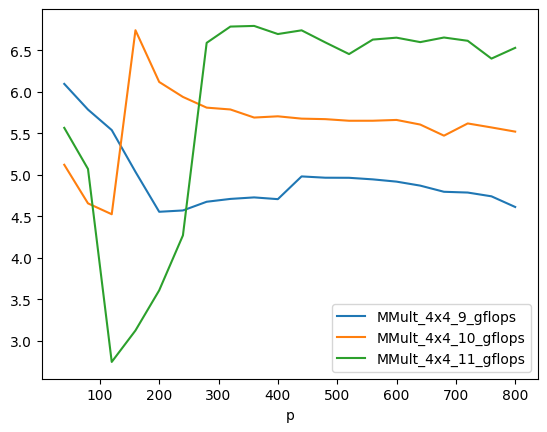

In [64]:
# import result and plot
data = load_data(['../data/MMult_4x4_9.csv', '../data/MMult_4x4_10.csv', '../data/MMult_4x4_11.csv'])
data.plot()

### Result

It is kind of superise me that blocking with size 256x128, will give extra performance gain

From original result, it also show performance gain, specially on big matrix

![MMult_4x4_10 vs MMult_4x4_11](../figures/compare_MMult-4x4-10_MMult-4x4-11.png)


Why we get the performance gain. The explaination could be 

The cache size is limited, when matrix size is bigger than L2 cache. No matter the matrix A and B is stored as column-major order or row-major order. The storage is not in continous in memory when we fetch 4x4 block.
When we divide matrix into big block, this will save the cost for read data into L2 cache. 

So we do operation by 4x4 block, we benefit from fusing multiple loops into 1. 
Here we do operation first by 256x128 block to save cost of loading data into Cache.

## Optimization 12 Packing into contiguous memory

First, we pack the block of A so that we march through it contiguously.

In [ ]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_11 -DOUT=../data/MMult_4x4_11 && make clean &&  make && make test

In [ ]:
# import result and plot
data = load_data(['../data/MMult_4x4_10.csv', '../data/MMult_4x4_11.csv'])
data.plot()

In [ ]:
# build and run the test
! cd ../build && cmake ../src -DNEW=MMult_4x4_11 -DOUT=../data/MMult_4x4_11 && make clean &&  make && make test

In [ ]:
# import result and plot
data = load_data(['../data/MMult_4x4_10.csv', '../data/MMult_4x4_11.csv'])
data.plot()